# Objectives

### This case study have 2 data sets "application_data.csv" and "previous_application.csv" which aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

### Steps followed are:
1. Understanding the variables.
2. Import the data sets.
3. Verify the structure of the data set.
4. Validate the missing value.
5. Dropping irrelevant columns.
6. Validation of outlier.
7. Imputing the values (if needed).
8. Performing Univariant Analysis.
9. Performing Segmented Univariant Analysis.
10. Performing Bivariant Analysis.

### Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

### Create a Dataframe df0 and Importing the application_data file to df0 data frame

In [2]:
df0=pd.read_csv("application_data.csv")
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

##### For getting the column names of application_data

In [3]:
df0.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

##### To get the rows and columns of application_data dataframe

In [4]:
df0.shape

(307511, 122)

#### To check the structure of the dataframe application_data

##### Check the column datatype information

In [5]:
df0.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### Missing Value Check

##### Validate the missing value percentage for each column

In [6]:
Missing_per = df0.isnull().sum()/df0.shape[0]*100
Missing_per

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Observation - Based on the above missing value validation it conclude that TARGET field (which is used to identify whether the client have payment difficulties or not) have no missing values.

##### Plotting bar chart

Text(0.5, 1.0, 'Missing Column Percentage')

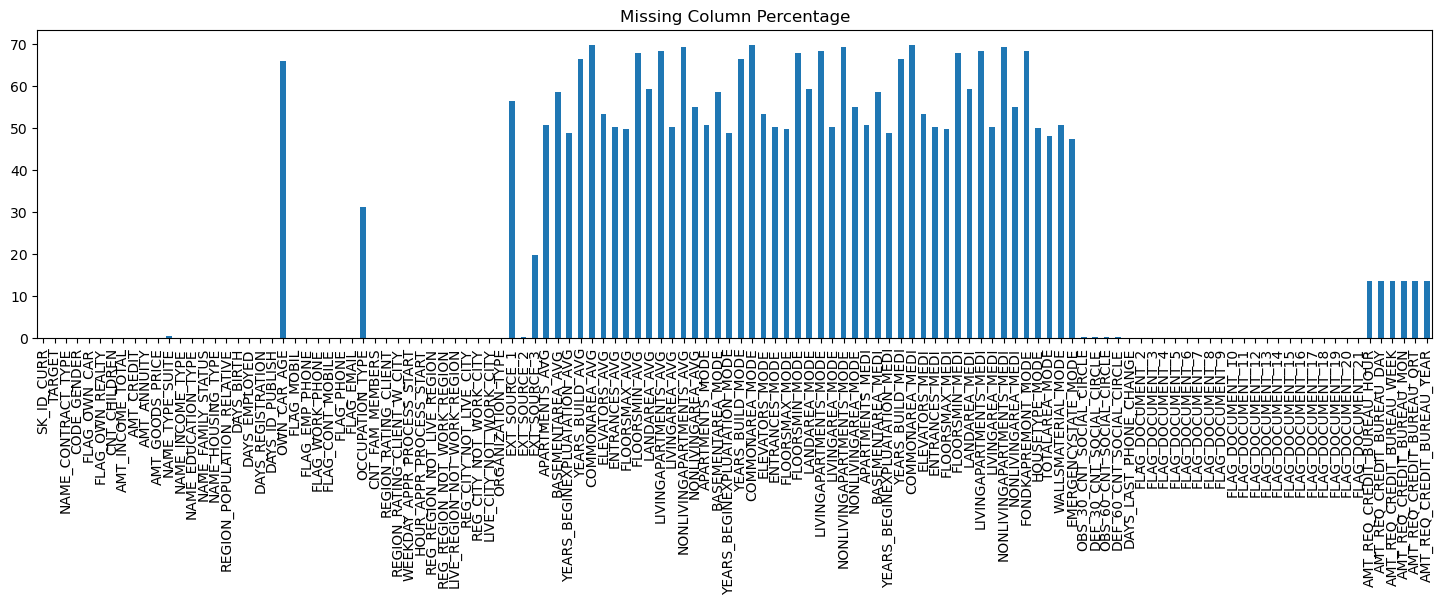

In [7]:
plt.figure(figsize=[18,4])
Missing_per.plot(kind="bar")
plt.title("Missing Column Percentage")

#### Assuming threshold of missing values as 40%, drop the columns where the threshold of missing values is more than 40%

In [8]:
#reset_index will not remove the default index
temp_df=(df0.isnull().sum()/df0.shape[0]*100).reset_index().rename(columns={"index":"Column_name",0:"Missing %"})

#set_index for setting the Column_name as the index
temp_df.set_index("Column_name")

,Missing %
Column_name,
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000


##### To filter only the missing columns

In [9]:
missing_col = list(temp_df[temp_df["Missing %"]>=40]["Column_name"])
missing_col

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

##### To get the length of missing columns

In [10]:
len(missing_col)

49

##### create a copy of the application_data dataframe

In [11]:
df0_copy=df0
print(df0_copy.shape)

(307511, 122)


#### Dropping the missing values columns from dataframe df0

In [12]:
df0.drop(missing_col,axis=1,inplace=True)

##### Total columns after dropping the missing columns from application_data dataframe

In [13]:
df0.shape

(307511, 73)

In [14]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Dropping the irrelevant columns

In [15]:
df0.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2','EXT_SOURCE_3','NAME_TYPE_SUITE','HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START'],axis=1,inplace=True)

In [16]:
df0.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [17]:
df0.shape

(307511, 34)

##### Columns still having empty values

In [18]:
rest_missing=df0.isnull().sum()/df0.shape[0]*100
rest_missing.sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_REGISTRATION               0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
ORGANIZATION_TYPE               0.000000
DAYS_ID_PUBLISH                 0.000000
SK_ID_CURR                      0.000000
TARGET                          0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_T

#### Validating the empty value count of AMT_REQ_CREDIT_BUREAU_QRT. Since the count is huge so we should repalce it with the MODE.

In [19]:
df0.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

41519

#### Replace the AMT_REQ_CREDIT_BUREAU_QRT with the mode of that column

In [20]:
df0.AMT_REQ_CREDIT_BUREAU_QRT.mode()
df0.AMT_REQ_CREDIT_BUREAU_QRT.fillna((df0.AMT_REQ_CREDIT_BUREAU_QRT.mode())[0],inplace=True)

In [21]:
df0.AMT_REQ_CREDIT_BUREAU_QRT.isna().sum()

0

#### Similarly replacing the empty values with MODE for "AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR" columns.

##### Replace the AMT_REQ_CREDIT_BUREAU_YEAR with the mode of that column

In [22]:
df0.AMT_REQ_CREDIT_BUREAU_YEAR.mode()
df0.AMT_REQ_CREDIT_BUREAU_YEAR.fillna((df0.AMT_REQ_CREDIT_BUREAU_YEAR.mode())[0],inplace=True)

##### Replace the AMT_REQ_CREDIT_BUREAU_MON with the mode of that column

In [23]:
df0.AMT_REQ_CREDIT_BUREAU_MON.mode()
df0.AMT_REQ_CREDIT_BUREAU_MON.fillna((df0.AMT_REQ_CREDIT_BUREAU_MON.mode())[0],inplace=True)

##### Replace the AMT_REQ_CREDIT_BUREAU_WEEK with the mode of that column

In [24]:
df0.AMT_REQ_CREDIT_BUREAU_WEEK.mode()
df0.AMT_REQ_CREDIT_BUREAU_WEEK.fillna((df0.AMT_REQ_CREDIT_BUREAU_WEEK.mode())[0],inplace=True)

##### Replace the AMT_REQ_CREDIT_BUREAU_DAY with the mode of that column

In [25]:
df0.AMT_REQ_CREDIT_BUREAU_DAY.mode()
df0.AMT_REQ_CREDIT_BUREAU_DAY.fillna((df0.AMT_REQ_CREDIT_BUREAU_DAY.mode())[0],inplace=True)

##### Replace the AMT_REQ_CREDIT_BUREAU_HOUR with the mode of that column

In [26]:
df0.AMT_REQ_CREDIT_BUREAU_HOUR.mode()
df0.AMT_REQ_CREDIT_BUREAU_HOUR.fillna((df0.AMT_REQ_CREDIT_BUREAU_HOUR.mode())[0],inplace=True)

##### Considering the AMT_ANNUITY column.

In [27]:
df0.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

##### Plotting box plot for AMT_ANNUITY field

<AxesSubplot:>

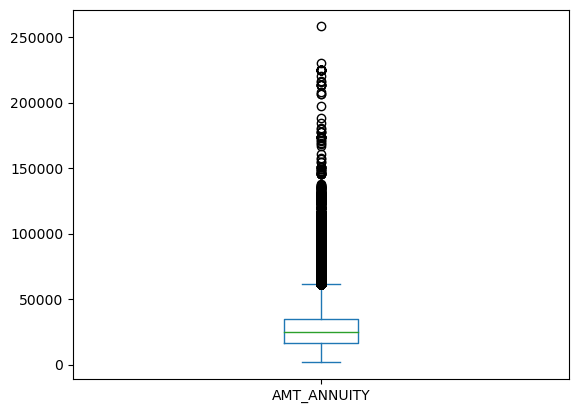

In [28]:
df0.AMT_ANNUITY.plot.box()

#### Observation - Based on above box plot, the outlier is more spreaded. Hence we should fill the empty values with the MEDIAN.

In [29]:
df0.AMT_ANNUITY = df0.AMT_ANNUITY.fillna(df0.AMT_ANNUITY.median())

##### Validating the empty values again

In [30]:
df0.isnull().sum()/df0.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_REGION_NOT_L

#### Considering the AMT_GOODS_PRICE column.

In [31]:
df0.AMT_GOODS_PRICE.describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

##### Plotting box plot for AMT_GOODS_PRICE field

<AxesSubplot:>

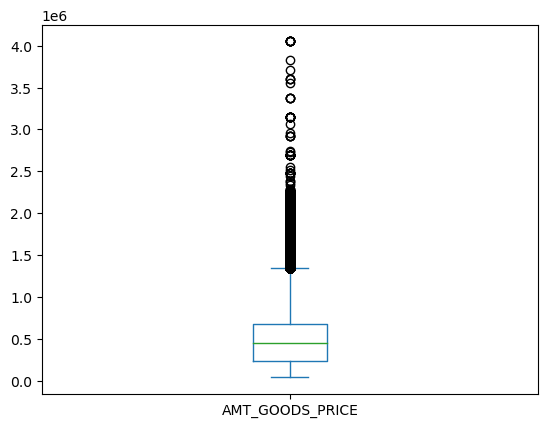

In [32]:
df0.AMT_GOODS_PRICE.plot.box()

#### Based on above box plot, the outlier is more spreaded. Hence we should fill the empty values with the MEDIAN.

In [33]:
df0.AMT_GOODS_PRICE = df0.AMT_GOODS_PRICE.fillna(df0.AMT_GOODS_PRICE.median())

##### Validating the empty values again

In [34]:
df0.isnull().sum()/df0.shape[0]*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_REGION_NOT_L

#### Considering the OCCUPATION_TYPE column

In [35]:
df0.OCCUPATION_TYPE.unique().tolist()

['Laborers',
 'Core staff',
 'Accountants',
 'Managers',
 nan,
 'Drivers',
 'Sales staff',
 'Cleaning staff',
 'Cooking staff',
 'Private service staff',
 'Medicine staff',
 'Security staff',
 'High skill tech staff',
 'Waiters/barmen staff',
 'Low-skill Laborers',
 'Realty agents',
 'Secretaries',
 'IT staff',
 'HR staff']

#### Percentage of indivisual values in OCCUPATION_TYPE column

In [36]:
df0.OCCUPATION_TYPE.value_counts(normalize=True)*100

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

##### Sum of total NULL values

In [37]:
df0.OCCUPATION_TYPE.isna().sum()

96391

#### Imputing the empty occupation values

In [38]:
df0.OCCUPATION_TYPE.fillna('Unknown',inplace=True)

#### Sum of indivisual values in OCCUPATION_TYPE column after imputing

In [39]:
df0.OCCUPATION_TYPE.value_counts()

Unknown                  96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

##### Plotting countplot for 'OCCUPATION_TYPE' columns

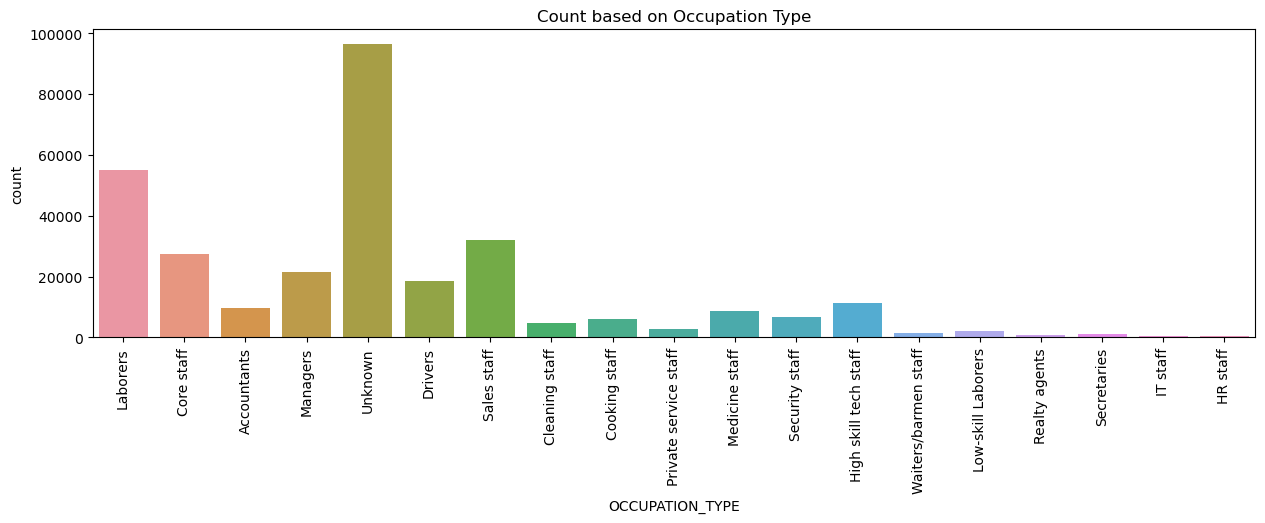

In [40]:
plt.figure(figsize=(15,4))
sns.countplot(data = df0, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.title("Count based on Occupation Type")
plt.show()

### Observation - All the empty column values were handeled.

#### Considering the NAME_FAMILY_STATUS column

In [41]:
df0.NAME_FAMILY_STATUS.unique().tolist()

['Single / not married',
 'Married',
 'Civil marriage',
 'Widow',
 'Separated',
 'Unknown']

In [42]:
df0.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

#### Replacing the NAME_FAMILY_STATUS column value Single / not married as Single

In [43]:
df0.replace(['Single / not married'],'Single',inplace=True)

#### Dropping the NAME_FAMILY_STATUS value as unknown by negating it

In [44]:
df0=df0[~(df0.NAME_FAMILY_STATUS=='Unknown')]

In [45]:
df0.NAME_FAMILY_STATUS.value_counts()

Married           196432
Single             45444
Civil marriage     29775
Separated          19770
Widow              16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### Validating the CODE_GENDER column

In [46]:
df0.CODE_GENDER.unique().tolist()

['M', 'F', 'XNA']

In [47]:
df0.CODE_GENDER.value_counts()

F      202447
M      105058
XNA         4
Name: CODE_GENDER, dtype: int64

#### Drop the columns where CODE_GENDER is XNA, as there are only 4 entries having incorrect data.

In [48]:
df0=df0[~(df0.CODE_GENDER=='XNA')]

In [49]:
df0.CODE_GENDER.value_counts()

F    202447
M    105058
Name: CODE_GENDER, dtype: int64

Text(0.5, 1.0, 'Loan applied based on Gender')

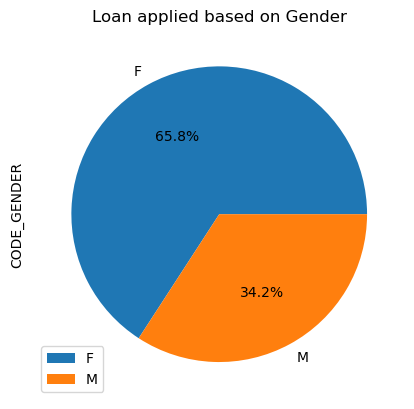

In [50]:
df0['CODE_GENDER'].value_counts(normalize= True).plot.pie(autopct='%1.1f%%',legend=True)
plt.title("Loan applied based on Gender")

### Conclusion - More Females have applied for loan

## Performing the UniVariant and Bi Variant Analysis

#### Number of people who were defaulter or not.

<AxesSubplot:title={'center':'Clients based on Target'}, ylabel='TARGET'>

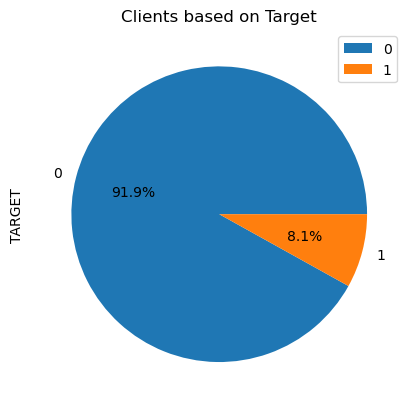

In [51]:
df0['TARGET'].value_counts(normalize= True).plot.pie(autopct='%1.1f%%',legend=True,title='Clients based on Target')

#### Data Imbalance % based on TARGET

In [52]:
df0["TARGET"].value_counts(normalize=True)*100

0    91.926961
1     8.073039
Name: TARGET, dtype: float64

### Conclusion: Clients with pay difficulties are less as compared to clients will no payment difficulties.

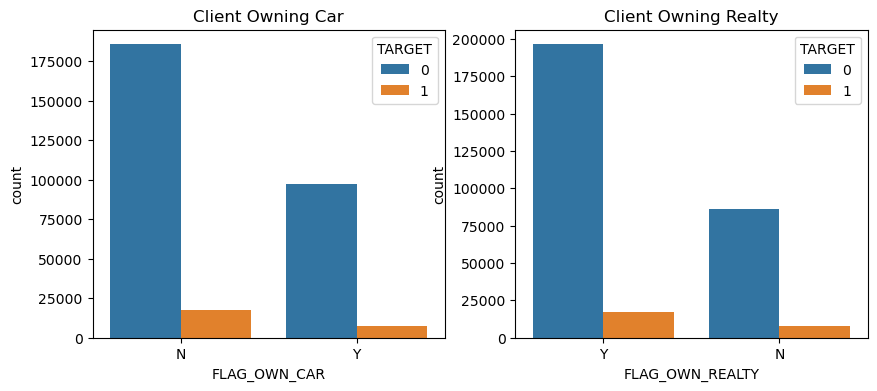

In [53]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sns.countplot(data = df0, x = "FLAG_OWN_CAR", hue = "TARGET")
plt.title('Client Owning Car')
plt.subplot(1,2,2)
sns.countplot(data = df0, x = "FLAG_OWN_REALTY", hue = "TARGET")
plt.title('Client Owning Realty')
plt.show()

### Conclusion- Considering the above chart Clients who dont have car are paying the loan properly and Clients who own the House are paying the loan properly. Hence Clients who own house but not car have no payment difficulties.

##### Considering the CNT_CHILDREN column

In [54]:
df0.CNT_CHILDREN.value_counts()

0     215367
1      61118
2      26748
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

Text(0.5, 1.0, 'Number of children validation')

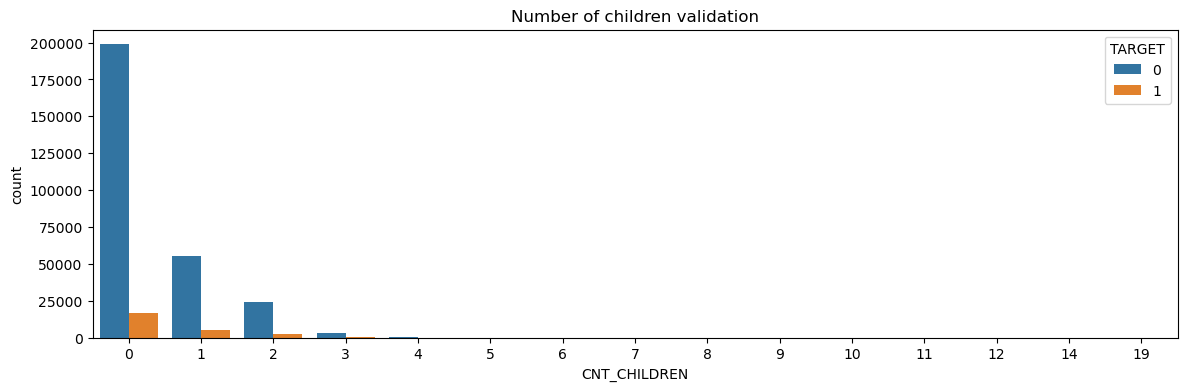

In [56]:
plt.figure(figsize=[14,4])
sns.countplot(data = df0, x = "CNT_CHILDREN", hue = "TARGET")
plt.title("Number of children validation")

### Conclusion - Clients having less children are paying the loan properly.

#### Converting DAYS_BIRTH to positive and getting the age

In [57]:
df0['DAYS_BIRTH']=df0['DAYS_BIRTH'].apply(lambda y: -y if y<0 else y)
df0['CLIENT_AGE']=round(df0['DAYS_BIRTH']/365)

In [58]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single,House / apartment,0.018801,9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,26.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,46.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single,House / apartment,0.010032,19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,52.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single,House / apartment,0.028663,19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,55.0


In [59]:
a=df0.pivot_table(index=df0['TARGET'],columns=df0['CODE_GENDER'],values='CLIENT_AGE')
a

CODE_GENDER,F,M
TARGET,,
0,45.483001,41.689978
1,41.646366,39.625434


Text(0.5, 1.0, 'Clients Age Based on Gender')

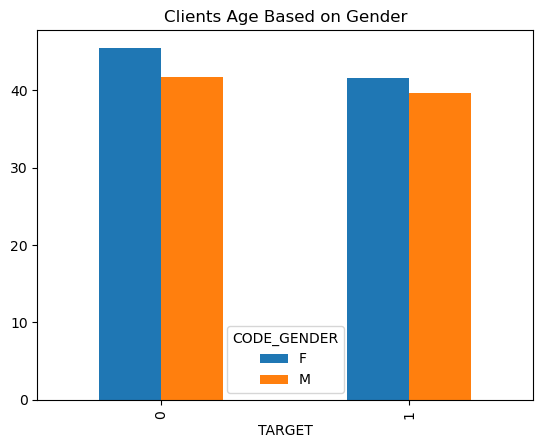

In [60]:
a.plot(kind='bar')
plt.title("Clients Age Based on Gender")

##### Binning the CLIENT_AGE into groups

In [61]:
df0["CLIENT_AGE_GRP"]= pd.cut(df0.CLIENT_AGE,[20, 30, 40, 50, 60, 100], labels= ["20-30","30-40","40-50","50-60",">60"])

In [62]:
df0.CLIENT_AGE_GRP.value_counts()

30-40    82767
40-50    75509
50-60    67954
20-30    48867
>60      32408
Name: CLIENT_AGE_GRP, dtype: int64

In [63]:
df0.CLIENT_AGE.describe()

count    307505.000000
mean         43.938798
std          11.964044
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: CLIENT_AGE, dtype: float64

Text(0.5, 1.0, 'Clients Age Group')

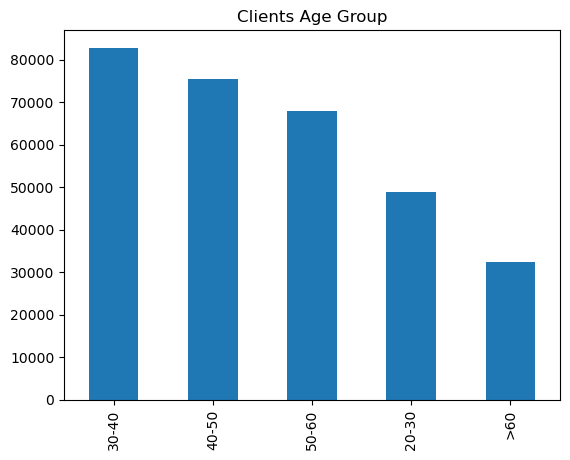

In [64]:
df0.CLIENT_AGE_GRP.value_counts().plot.bar()
plt.title("Clients Age Group")

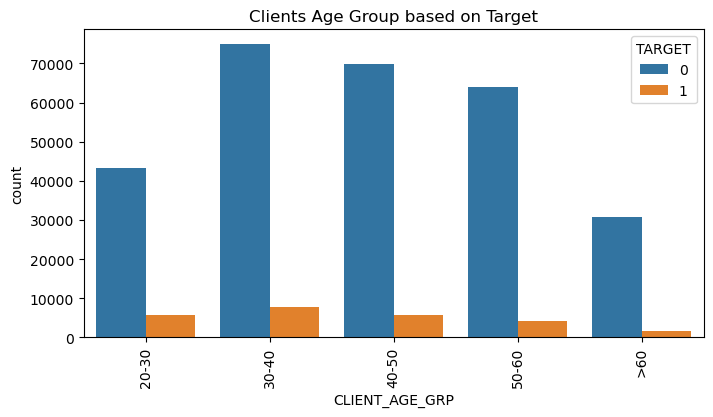

In [65]:
plt.figure(figsize=(8,4))
sns.countplot(data = df0, x = "CLIENT_AGE_GRP",hue="TARGET")
plt.xticks(rotation = 90)
plt.title("Clients Age Group based on Target")
plt.show()

### Conclusion - Majority of Clients with Age group of 30-40 are paying the loan properly.

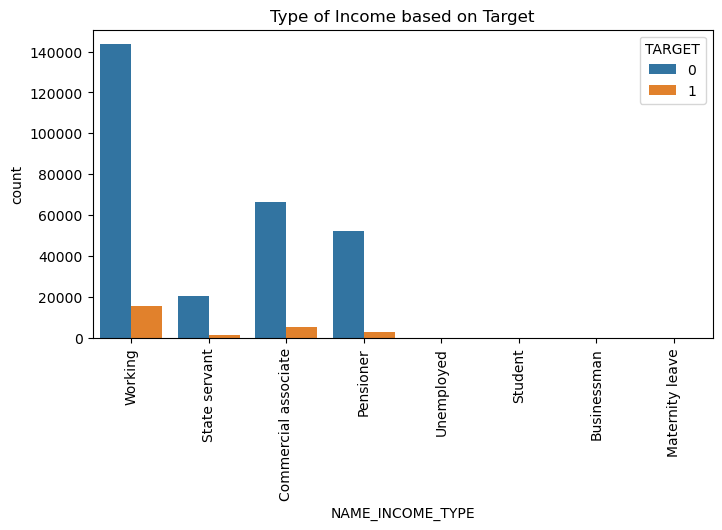

In [66]:
plt.figure(figsize=(8,4))
sns.countplot(data = df0, x = "NAME_INCOME_TYPE",hue="TARGET")
plt.xticks(rotation = 90)
plt.title("Type of Income based on Target")
plt.show()

### Conclusion - Working peoples are paying the loans properly.

##### Considering NAME_EDUCATION_TYPE column

Text(0.5, 1.0, 'Clients Education')

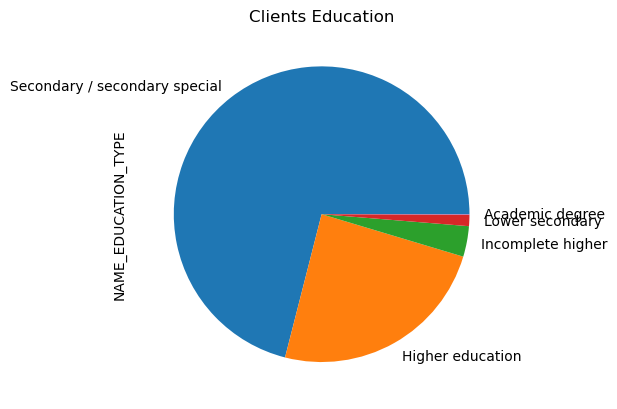

In [67]:
df0.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.pie()
plt.title("Clients Education")

### Conclusion - Clients who have education type as 'Secondary/Secondary Special' have taken more loans.

##### Converting the values in 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE' to dollars

In [68]:
df0['INCOME_DOLLAR']=np.round((df0['AMT_INCOME_TOTAL']/81),2)
df0['CREDIT_DOLLAR']=np.round((df0['AMT_CREDIT']/81),2)
df0['ANNUITY_DOLLAR']=np.round((df0['AMT_ANNUITY']/81),2)
df0['GOODS_DOLLAR']=np.round((df0['AMT_GOODS_PRICE']/81),2)

In [69]:
df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,CLIENT_AGE_GRP,INCOME_DOLLAR,CREDIT_DOLLAR,ANNUITY_DOLLAR,GOODS_DOLLAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single,House / apartment,0.018801,9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,26.0,20-30,2500.00,5019.72,304.94,4333.33
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50,3333.33,15969.17,440.72,13944.44
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single,House / apartment,0.010032,19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60,833.33,1666.67,83.33,1666.67
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60,1666.67,3860.28,366.50,3666.67
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single,House / apartment,0.028663,19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,55.0,50-60,1500.00,6333.33,269.94,6333.33


##### Considering ANNUITY_DOLLAR column values

In [70]:
df0.ANNUITY_DOLLAR.describe()

count    307505.000000
mean        334.673445
std         178.932867
min          19.940000
25%         204.000000
50%         307.440000
75%         427.110000
max        3185.500000
Name: ANNUITY_DOLLAR, dtype: float64

##### Grouping ANNUITY_DOLLAR columns into groups/bins

In [71]:
df0["ANNUITY_DOLLAR_GRP"]= pd.cut(df0.ANNUITY_DOLLAR,[0, 500, 1000, 2000, 4000], labels= ["<500$","500$-1k$","1k$-2k$","2k$-4k$"])

In [72]:
df0.ANNUITY_DOLLAR_GRP.value_counts()

<500$       260449
500$-1k$     45605
1k$-2k$       1393
2k$-4k$         58
Name: ANNUITY_DOLLAR_GRP, dtype: int64

##### Considering CREDIT_DOLLAR column values

In [73]:
df0.CREDIT_DOLLAR.describe()

count    307505.000000
mean       7395.412136
std        4969.060327
min         555.560000
25%        3333.330000
50%        6339.890000
75%        9983.330000
max       50000.000000
Name: CREDIT_DOLLAR, dtype: float64

##### Grouping CREDIT_DOLLAR column into groups/bins

In [74]:
df0["CREDIT_DOLLAR_GRP"]= pd.cut(df0.CREDIT_DOLLAR,[0, 1000, 10000, 25000, 60000], labels= ["<1k$","1k$-10k$","10k$-25k$","25k$-60k$"])

In [75]:
df0.CREDIT_DOLLAR_GRP.value_counts()

1k$-10k$     228780
10k$-25k$     73674
<1k$           3568
25k$-60k$      1483
Name: CREDIT_DOLLAR_GRP, dtype: int64

##### Considering INCOME_DOLLAR column values

In [76]:
df0.INCOME_DOLLAR.describe()

count    3.075050e+05
mean     2.083909e+03
std      2.927467e+03
min      3.166700e+02
25%      1.388890e+03
50%      1.816670e+03
75%      2.500000e+03
max      1.444444e+06
Name: INCOME_DOLLAR, dtype: float64

##### Grouping INCOME_DOLLAR into groups/bins

In [77]:
df0["INCOME_DOLLAR_GRP"]= pd.cut(df0.INCOME_DOLLAR,[0, 10000, 50000, 100000, 500000, 1000000, 1500000], labels= ["<10k$","10k$-50k$","50k$-100k$","100k$-500k$", "500k$-1000k$", "1000k$-1500k$"])

In [78]:
df0.INCOME_DOLLAR_GRP.value_counts()

<10k$            307018
10k$-50k$           478
50k$-100k$            5
100k$-500k$           3
1000k$-1500k$         1
500k$-1000k$          0
Name: INCOME_DOLLAR_GRP, dtype: int64

##### Considering GOODS_DOLLAR column values

In [79]:
df0.GOODS_DOLLAR.describe()

count    307505.000000
mean       6645.906019
std        4559.146704
min         500.000000
25%        2944.440000
50%        5555.560000
75%        8388.890000
max       50000.000000
Name: GOODS_DOLLAR, dtype: float64

##### Grouping GOODS_DOLLAR into groups/bins

In [80]:
df0["GOODS_DOLLAR_GRP"]= pd.cut(df0.GOODS_DOLLAR,[0, 500, 1000, 5000, 10000, 30000, 60000], labels= ["<500$","500$-1k$","1k$-5k$","5k$-10k$","10k$-30k$","25k$-60k$"])

In [81]:
df0.GOODS_DOLLAR_GRP.value_counts()

1k$-5k$      124337
5k$-10k$     117111
10k$-30k$     61504
500$-1k$       4487
25k$-60k$        65
<500$             1
Name: GOODS_DOLLAR_GRP, dtype: int64

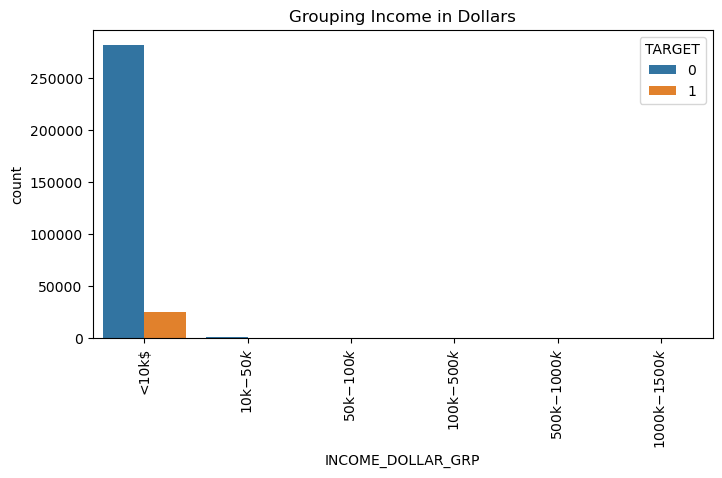

In [82]:
plt.figure(figsize=(8,4))
sns.countplot(data = df0, x = "INCOME_DOLLAR_GRP",hue="TARGET")
plt.xticks(rotation = 90)
plt.title("Grouping Income in Dollars")
plt.show()

### Conclusion - Clients having Income range less than 10000 dollar are the one’s who were paying of loans properly.

<AxesSubplot:xlabel='TARGET', ylabel='CREDIT_DOLLAR'>

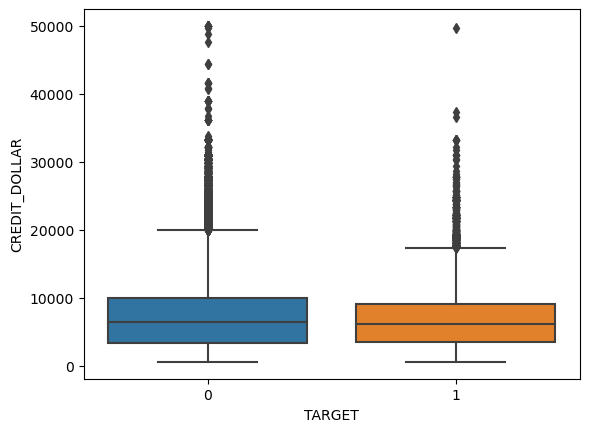

In [83]:
sns.boxplot(data=df0,x="TARGET", y="CREDIT_DOLLAR")

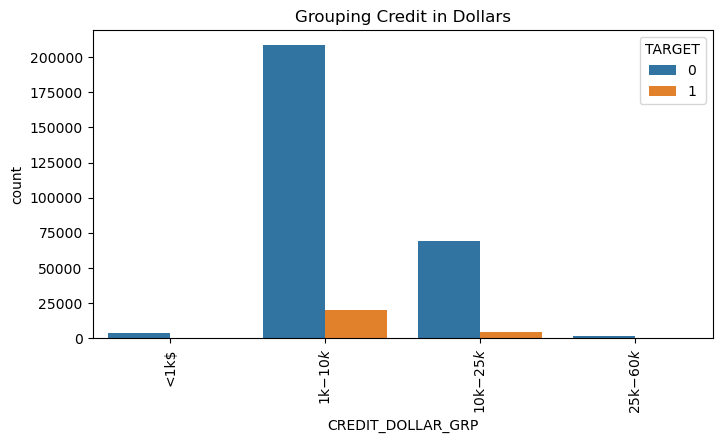

In [84]:
plt.figure(figsize=(8,4))
sns.countplot(data = df0, x = "CREDIT_DOLLAR_GRP",hue="TARGET")
plt.xticks(rotation = 90)
plt.title("Grouping Credit in Dollars")
plt.show()

### Conclusion - Many clients have taken credits between 1000 to 10000 dollars are the one's who were paying off the loan properly.

### Segmented Univariant Analysis

#### Storing the Target 0 rows in separate dataframe

In [85]:
df1=df0[df0["TARGET"]==0]
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,CLIENT_AGE_GRP,INCOME_DOLLAR,CREDIT_DOLLAR,ANNUITY_DOLLAR,GOODS_DOLLAR,ANNUITY_DOLLAR_GRP,CREDIT_DOLLAR_GRP,INCOME_DOLLAR_GRP,GOODS_DOLLAR_GRP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50,3333.33,15969.17,440.72,13944.44,<500$,10k$-25k$,<10k$,10k$-30k$
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single,House / apartment,0.010032,19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60,833.33,1666.67,83.33,1666.67,<500$,1k$-10k$,<10k$,1k$-5k$
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,Laborers,2.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60,1666.67,3860.28,366.50,3666.67,<500$,1k$-10k$,<10k$,1k$-5k$
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Working,Secondary / secondary special,Single,House / apartment,0.028663,19932,-3038,-4311.0,-3458,Core staff,1.0,2,2,0,0,0,Religion,0.0,0.0,0.0,0.0,0.0,0.0,55.0,50-60,1500.00,6333.33,269.94,6333.33,<500$,1k$-10k$,<10k$,5k$-10k$
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,-1588,-4970.0,-477,Laborers,2.0,2,2,0,0,0,Other,0.0,0.0,0.0,0.0,1.0,1.0,46.0,40-50,1222.22,6055.50,339.72,5611.11,<500$,1k$-10k$,<10k$,5k$-10k$


#### Storing the Target 1 rows in separate dataframe

In [86]:
df2=df0[df0["TARGET"]==1]
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,CLIENT_AGE_GRP,INCOME_DOLLAR,CREDIT_DOLLAR,ANNUITY_DOLLAR,GOODS_DOLLAR,ANNUITY_DOLLAR_GRP,CREDIT_DOLLAR_GRP,INCOME_DOLLAR_GRP,GOODS_DOLLAR_GRP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single,House / apartment,0.018801,9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,26.0,20-30,2500.00,5019.72,304.94,4333.33,<500$,1k$-10k$,<10k$,1k$-5k$
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,-2628,-6573.0,-1827,Cooking staff,1.0,3,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,2.0,2.0,51.0,50-60,1388.89,12098.67,334.28,8666.67,<500$,10k$-25k$,<10k$,5k$-10k$
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,-1262,-1182.0,-1029,Laborers,2.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,48.0,40-50,2500.00,14735.56,432.44,10555.56,<500$,10k$-25k$,<10k$,10k$-30k$
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,-3597,-45.0,-4409,Sales staff,2.0,3,3,0,0,0,Self-employed,0.0,0.0,0.0,0.0,0.0,2.0,37.0,30-40,1666.67,3566.33,200.72,2944.44,<500$,1k$-10k$,<10k$,1k$-5k$
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,-5391.0,-4199,Unknown,2.0,2,2,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0.0,68.0,>60,1000.00,3111.11,180.17,3111.11,<500$,1k$-10k$,<10k$,1k$-5k$


### Considering the Dataframe having the defauters

Text(0.5, 1.0, 'Defaulters by Gender')

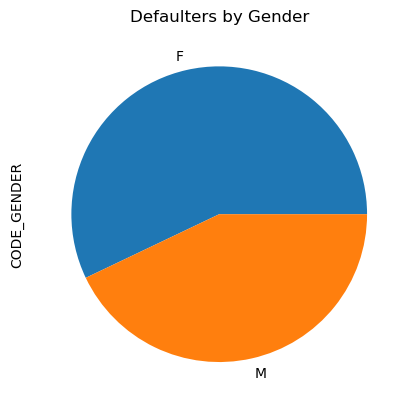

In [87]:
df2['CODE_GENDER'].value_counts(normalize= True).plot.pie()
plt.title("Defaulters by Gender")

### Conclusion - More Females compared to men are having diffultlies in paying the loan.

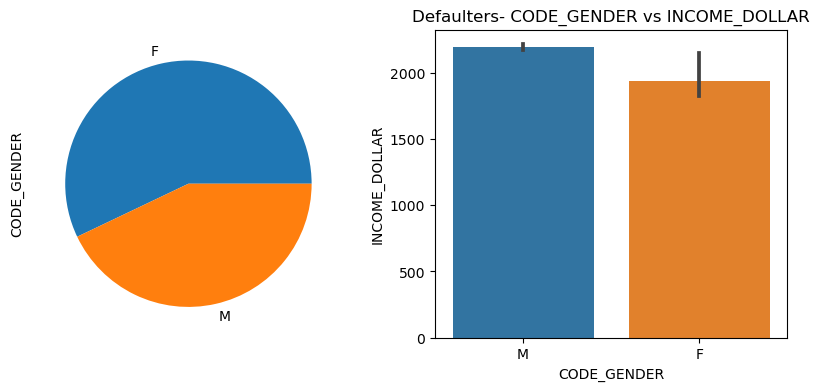

In [88]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
df2['CODE_GENDER'].value_counts(normalize= True).plot.pie()
plt.subplot(1,2,2)
sns.barplot(df2['CODE_GENDER'],df2['INCOME_DOLLAR'])
plt.title("Defaulters- CODE_GENDER vs INCOME_DOLLAR")
plt.show()

### Conclusion - Males who income more are the defaulters. Females get paid less have difficulties in paying off the loans.

#### Observing the CNT_FAM_MEMBERS & CNT_CHILDREN columns

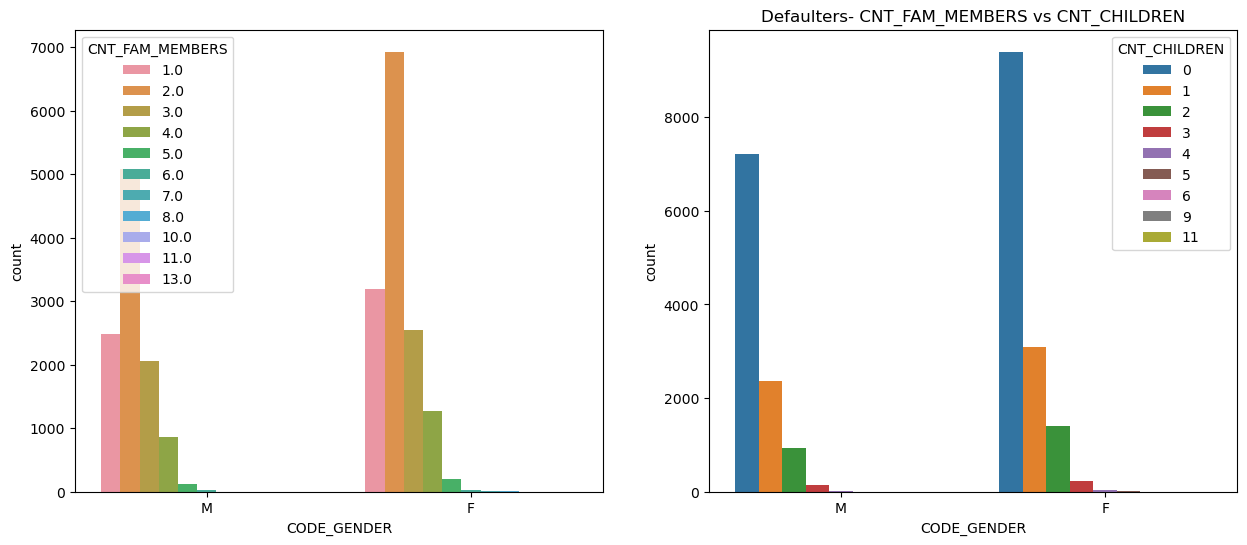

In [89]:
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
sns.countplot(df2['CODE_GENDER'], hue = df2['CNT_FAM_MEMBERS'] )
plt.subplot(1,2,2)
sns.countplot(df2['CODE_GENDER'], hue = df2['CNT_CHILDREN'] )
plt.title("Defaulters- CNT_FAM_MEMBERS vs CNT_CHILDREN")
plt.show()

### Conclusion - Clients having 2 family members without children are the defaulters

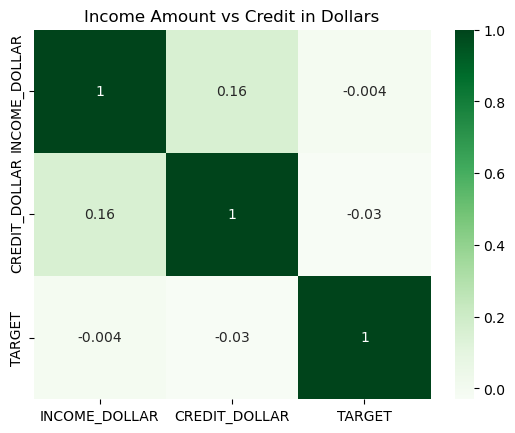

In [90]:
sns.heatmap( df0[['INCOME_DOLLAR', 'CREDIT_DOLLAR', 'TARGET']].corr(), annot= True, cmap= "Greens")
plt.title('Income Amount vs Credit in Dollars')
plt.show()

Text(0.5, 1.0, 'Non-Defaulters: Income Amount vs Credit')

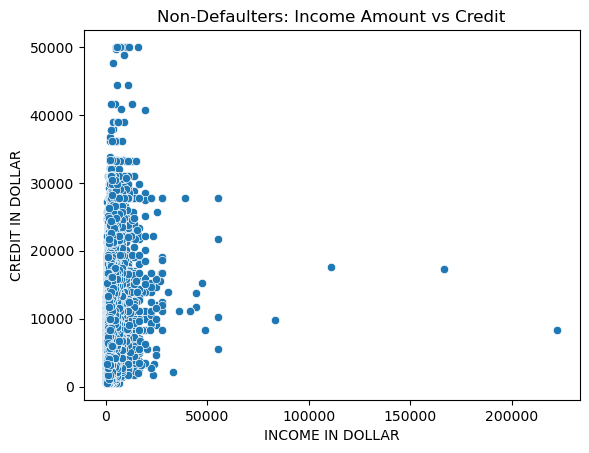

In [91]:
sns.scatterplot(df1.INCOME_DOLLAR,df1.CREDIT_DOLLAR)
plt.xlabel('INCOME IN DOLLAR')
plt.ylabel('CREDIT IN DOLLAR')
plt.title('Non-Defaulters: Income Amount vs Credit')

Text(0.5, 1.0, 'Defaulters: Income Amount vs Credit')

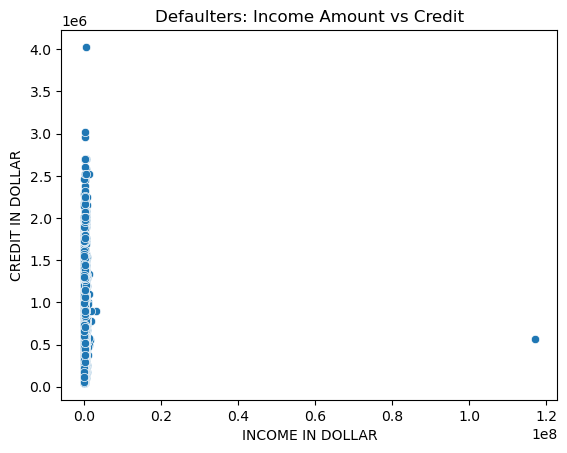

In [92]:
sns.scatterplot(df2.AMT_INCOME_TOTAL,df2.AMT_CREDIT)
plt.xlabel('INCOME IN DOLLAR')
plt.ylabel('CREDIT IN DOLLAR')
plt.title('Defaulters: Income Amount vs Credit')

### Conclusion: Low Income range peoples are more defaulters

In [93]:
df2.pivot_table(index='CODE_GENDER',columns='NAME_FAMILY_STATUS',values='CREDIT_DOLLAR')

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single,Widow
CODE_GENDER,,,,,
F,6271.051398,7400.636768,6605.296967,5963.264563,6555.370785
M,6206.232276,7334.428820,6405.828557,5861.552620,5749.069541


### Conclusion - Married Male and Female were having difficulties in paying the loan.

# Import previous application data to pr_df0 dataframe

In [94]:
pr_df0=pd.read_csv("previous_application.csv")
pr_df0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Validating the shape of the previous application dataframe pr_df0

In [95]:
pr_df0.shape

(1670214, 37)

#### Validating the structure of the columns in pr_df0 dataframe 

In [96]:
pr_df0.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Missing Value Check

#### Validate the missing value percentage for each column

In [97]:
Empty_per = pr_df0.isnull().sum()/pr_df0.shape[0]*100
Empty_per.sort_values(ascending=False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

Text(0.5, 1.0, 'Missing Percent of Column in Previous Application Dataset')

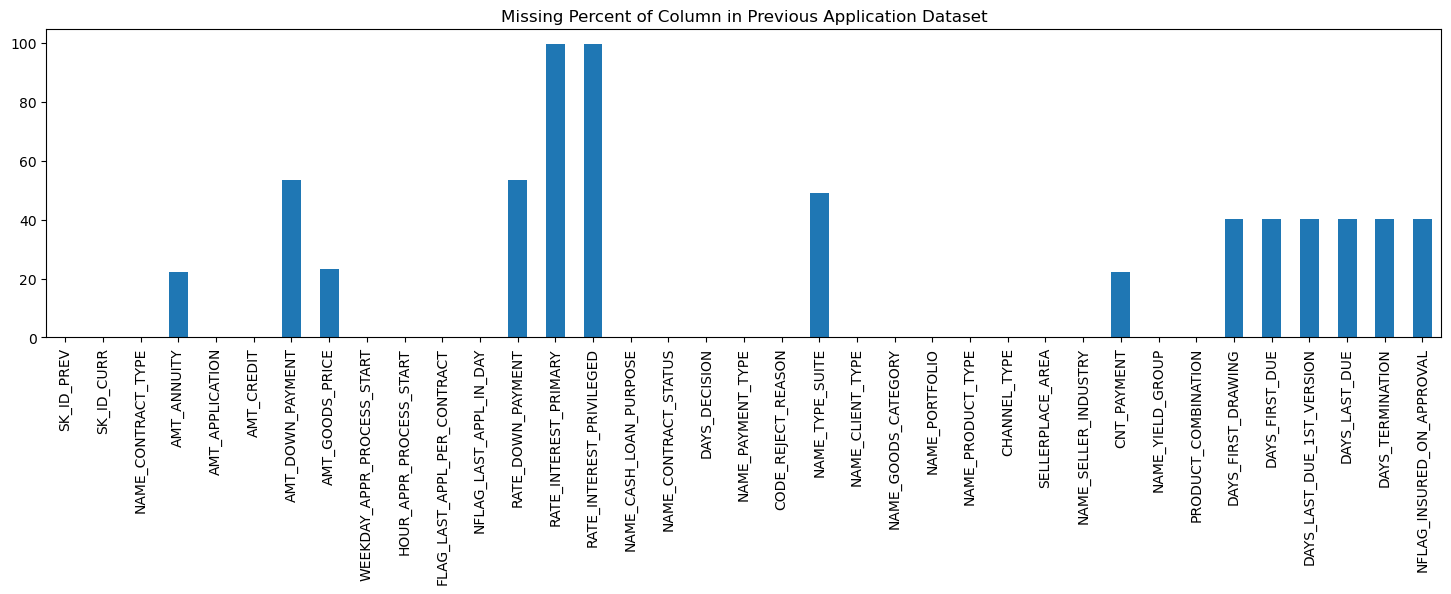

In [98]:
plt.figure(figsize=[18,4])
Empty_per.plot(kind="bar")
plt.title('Missing Percent of Column in Previous Application Dataset')

#### Assuming threshold of missing values as 40%, drop the columns where the threshold of missing values is more than 40%

In [99]:
#reset_index will not remove the default index
t_df=(pr_df0.isnull().sum()/pr_df0.shape[0]*100).reset_index().rename(columns={"index":"Column_name",0:"Missing %"})

#set_index for setting the Column_name as the index
t_df.set_index("Column_name")

,Missing %
Column_name,
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,0.000000


##### To filter only the missing columns

In [100]:
empty_col = list(t_df[t_df["Missing %"]>=40]["Column_name"])
empty_col

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

##### To get the length of missing columns

In [101]:
len(empty_col)

11

### Dropping the missing values columns from dataframe pr_df0

In [102]:
pr_df0.drop(empty_col,axis=1,inplace=True)

##### Validating the columns again

In [103]:
pr_df0.columns.to_list()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

##### Shape of pr_df0 after droping column with missing values.

In [104]:
pr_df0.shape

(1670214, 26)

##### Remaining columns where empty values still exist

In [105]:
rem_per = pr_df0.isnull().sum()/pr_df0.shape[0]*100
rem_per.sort_values(ascending=False)

AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

##### Considering AMT_GOODS_PRICE column

In [106]:
pr_df0.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:xlabel='AMT_GOODS_PRICE'>

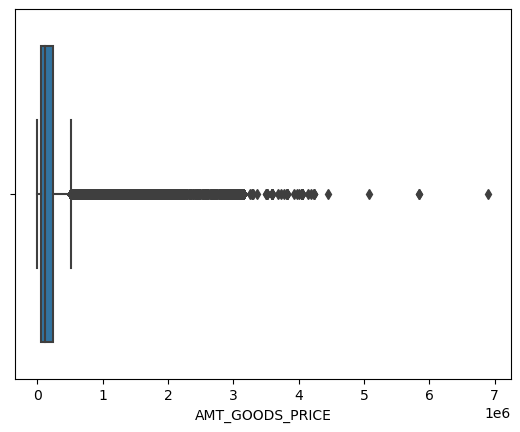

In [107]:
sns.boxplot(pr_df0['AMT_GOODS_PRICE'])

##### Filling the Null values in AMT_GOODS_PRICE with the MEDIAN values of the same field.

In [108]:
pr_df0.AMT_GOODS_PRICE = pr_df0.AMT_GOODS_PRICE.fillna(pr_df0.AMT_GOODS_PRICE.median())

#### Considering AMT_ANNUITY column

In [109]:
pr_df0.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

##### Validating more deep into the quantiles

In [110]:
pr_df0.AMT_ANNUITY.quantile([0.25,0.55,0.65,0.75,0.85,0.95,0.99])

0.25     6321.7800
0.55    12437.5050
0.65    15733.5615
0.75    20658.4200
0.85    27896.9805
0.95    45336.7800
0.99    69685.7886
Name: AMT_ANNUITY, dtype: float64

##### Filling the Null values in AMT_ANNUITY with the MEDIAN values of the same field

In [111]:
pr_df0.AMT_ANNUITY = pr_df0.AMT_ANNUITY.fillna(pr_df0.AMT_ANNUITY.median())

##### Validating CNT_PAYMENT column

In [112]:
pr_df0.CNT_PAYMENT.describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

In [113]:
pr_df0.CNT_PAYMENT.quantile([0.25,0.55,0.65,0.75,0.85,0.95,0.99])

0.25     6.0
0.55    12.0
0.65    12.0
0.75    24.0
0.85    30.0
0.95    48.0
0.99    60.0
Name: CNT_PAYMENT, dtype: float64

##### Setting the NULL values with 0

In [114]:
pr_df0['CNT_PAYMENT'].fillna(0,inplace = True)

##### Validating Null values in AMT_CREDIT column

In [115]:
pr_df0[pr_df0.AMT_CREDIT.isna()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
1127152,2204450,438387,Revolving loans,0.0,0.0,NaN,112320.0,FRIDAY,10,Y,1,XAP,Approved,-608,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street


##### Dropping the AMT_CREDIT null values, since only 1 record exist

In [116]:
pr_df0 = pr_df0[~pr_df0.AMT_CREDIT.isna()]

##### Validating for further NULL values in pr_df0 datframe

In [117]:
pr_df0.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION            346
dtype: int64

##### Validating PRODUCT_COMBINATION column values

In [118]:
pr_df0.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112581
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

### Performing the UniVariant and Bi Variant Analysis for Previous Application Data

##### Considering NAME_CONTRACT_TYPE column values

In [119]:
pr_df0.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193163
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

Text(0.5, 1.0, 'Contract Type Validation')

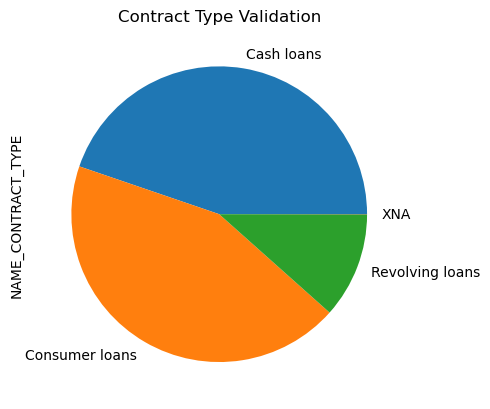

In [120]:
pr_df0.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie()
plt.title('Contract Type Validation')

##### Considering CODE_REJECT_REASON column values

In [121]:
pr_df0.CODE_REJECT_REASON.value_counts()

XAP       1353092
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

##### Considering NAME_CLIENT_TYPE column

In [122]:
pr_df0.NAME_CLIENT_TYPE.value_counts(normalize=True) * 100

Repeater     73.718741
New          18.043387
Refreshed     8.121659
XNA           0.116213
Name: NAME_CLIENT_TYPE, dtype: float64

### Merging both application data and previous application data set.

In [123]:
Merged_df0=pd.merge(left=df0,right=pr_df0,on="SK_ID_CURR",how="inner")

In [124]:
Merged_df0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,CLIENT_AGE_GRP,INCOME_DOLLAR,CREDIT_DOLLAR,ANNUITY_DOLLAR,GOODS_DOLLAR,ANNUITY_DOLLAR_GRP,CREDIT_DOLLAR_GRP,INCOME_DOLLAR_GRP,GOODS_DOLLAR_GRP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single,House / apartment,0.018801,9461,-637,-3648.0,-2120,Laborers,1.0,2,2,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,26.0,20-30,2500.00,5019.72,304.94,4333.33,<500$,1k$-10k$,<10k$,1k$-5k$,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50,3333.33,15969.17,440.72,13944.44,<500$,10k$-25k$,<10k$,10k$-30k$,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50,3333.33,15969.17,440.72,13944.44,<500$,10k$-25k$,<10k$,10k$-30k$,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,Core staff,2.0,1,1,0,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,46.0,40-50,3333.33,15969.17,440.72,13944.44,<500$,10k$-25k$,<10k$,10k$-30k$,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single,House / apartment,0.010032,19046,-225,-4260.0,-2531,Laborers,1.0,2,2,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52.0,50-60,833.33,1666.67,83.33,1666.67,<500$,1k$-10k$,<10k$,1k$-5k$,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


##### Validating the shape of the Merged data set

In [125]:
Merged_df0.shape

(1413645, 69)

##### Validating the datatype of the columns in the merged dataset

In [126]:
Merged_df0.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413645 entries, 0 to 1413644
Data columns (total 69 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413645 non-null  int64   
 1   TARGET                       1413645 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413645 non-null  object  
 3   CODE_GENDER                  1413645 non-null  object  
 4   FLAG_OWN_CAR                 1413645 non-null  object  
 5   FLAG_OWN_REALTY              1413645 non-null  object  
 6   CNT_CHILDREN                 1413645 non-null  int64   
 7   AMT_INCOME_TOTAL             1413645 non-null  float64 
 8   AMT_CREDIT_x                 1413645 non-null  float64 
 9   AMT_ANNUITY_x                1413645 non-null  float64 
 10  AMT_GOODS_PRICE_x            1413645 non-null  float64 
 11  NAME_INCOME_TYPE             1413645 non-null  object  
 12  NAME_EDUCATION_TYPE         

##### Verifying the percentage of missing column value in merged dataset

In [127]:
Null_per = Merged_df0.isnull().sum()/Merged_df0.shape[0]*100
Null_per.sort_values(ascending=False)

PRODUCT_COMBINATION            0.022141
SK_ID_PREV                     0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
AMT_GOODS_PRICE_y              0.000000
AMT_CREDIT_y                   0.000000
AMT_APPLICATION                0.000000
AMT_ANNUITY_y                  0.000000
NAME_CONTRACT_TYPE_y           0.000000
GOODS_DOLLAR_GRP               0.000000
CLIENT_AGE_GRP                 0.000000
INCOME_DOLLAR_GRP              0.000000
CREDIT_DOLLAR_GRP              0.000000
ANNUITY_DOLLAR_GRP             0.000000
GOODS_DOLLAR                   0.000000
ANNUITY_DOLLAR                 0.000000
CREDIT_DOLLAR                  0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000


##### Considering the PRODUCT_COMBINATION column values

In [128]:
Merged_df0.PRODUCT_COMBINATION.value_counts()

Cash                              235094
POS household with interest       226459
POS mobile with interest          190841
Cash X-Sell: middle               120032
Cash X-Sell: low                  110595
Card Street                        94589
POS industry with interest         83505
POS household without interest     71519
Card X-Sell                        66763
Cash Street: high                  51697
Cash X-Sell: high                  50796
Cash Street: middle                29934
Cash Street: low                   28593
POS other with interest            20309
POS mobile without interest        19890
POS industry without interest      10621
POS others without interest         2095
Name: PRODUCT_COMBINATION, dtype: int64

##### Validating the missing values in the column

In [129]:
Merged_df0.PRODUCT_COMBINATION.isnull().sum()

313

##### Removing the Null values from the PRODUCT_COMBINATION field

In [130]:
Merged_df0 = Merged_df0[~Merged_df0.PRODUCT_COMBINATION.isna()]

##### Again Valdating the NULL value in the PRODUCT_COMBINATION column

In [131]:
Merged_df0.PRODUCT_COMBINATION.isnull().sum()

0

#### Plotting Graph for different columns

Text(0.5, 1.0, 'NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE')

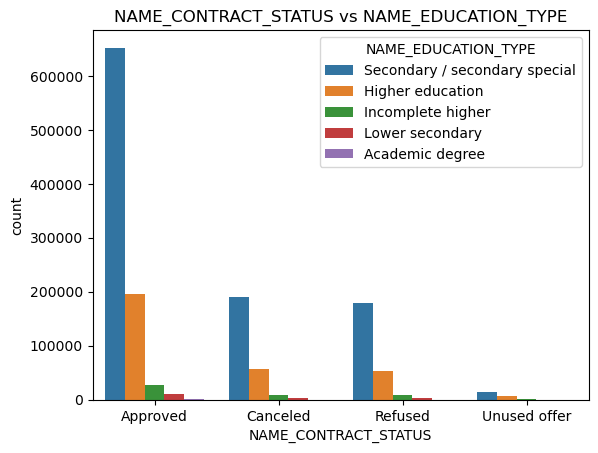

In [132]:
sns.countplot(data = Merged_df0, x = "NAME_CONTRACT_STATUS", hue = "NAME_EDUCATION_TYPE")
plt.title("NAME_CONTRACT_STATUS vs NAME_EDUCATION_TYPE")

##### Considering NAME_CASH_LOAN_PURPOSE column

In [133]:
Merged_df0.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 786591
XNA                                 567329
Repairs                              20117
Other                                13432
Urgent needs                          7236
Buying a used car                     2469
Building a house or an annex          2344
Everyday expenses                     2052
Medicine                              1871
Payments on other loans               1573
Education                             1334
Journey                               1041
Purchase of electronic equipment       934
Buying a new car                       886
Wedding / gift / holiday               801
Buying a home                          701
Car repairs                            691
Furniture                              660
Buying a holiday home / land           463
Business development                   359
Gasification / water supply            251
Buying a garage                        116
Hobby                                   45
Money for a

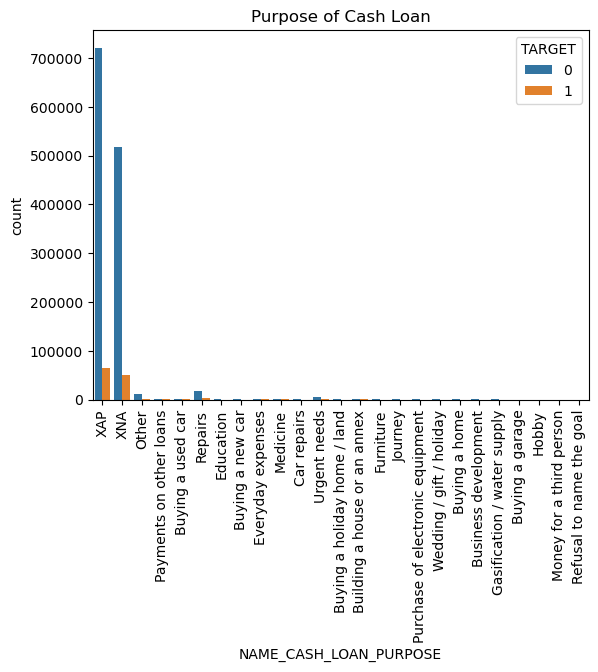

In [134]:
sns.countplot(Merged_df0['NAME_CASH_LOAN_PURPOSE'],hue=Merged_df0['TARGET'])
plt.xticks(rotation = 90)
plt.title("Purpose of Cash Loan")
plt.show()

#### Observation - It Seems like NAME_CASH_LOAN_PURPOSE with values as 'XAP' and 'XNA' is irrelevant values, hence will drop it.

In [135]:
Merged_df0=Merged_df0[~(Merged_df0['NAME_CASH_LOAN_PURPOSE']=='XAP')]

In [136]:
Merged_df0=Merged_df0[~(Merged_df0['NAME_CASH_LOAN_PURPOSE']=='XNA')]

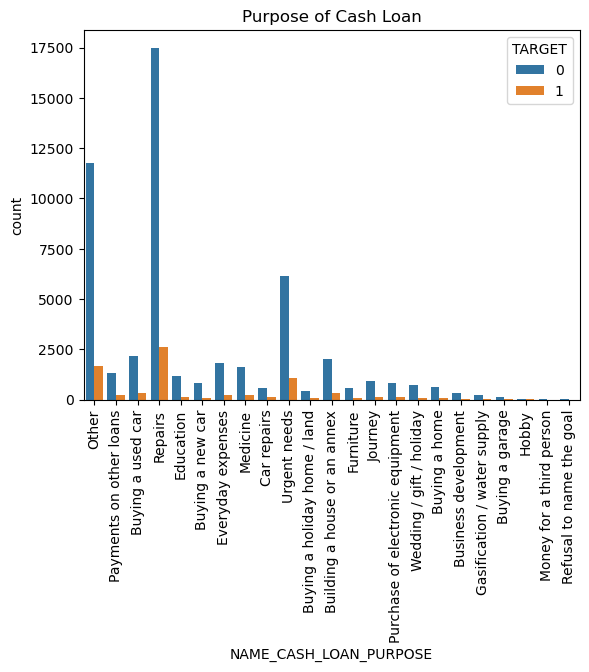

In [137]:
sns.countplot(Merged_df0['NAME_CASH_LOAN_PURPOSE'],hue=Merged_df0['TARGET'])
plt.xticks(rotation = 90)
plt.title("Purpose of Cash Loan")
plt.show()

##### Again validating the shape of merged dataset

In [138]:
Merged_df0.shape

(59412, 69)

Text(0.5, 1.0, 'Clients respective to Contract Status')

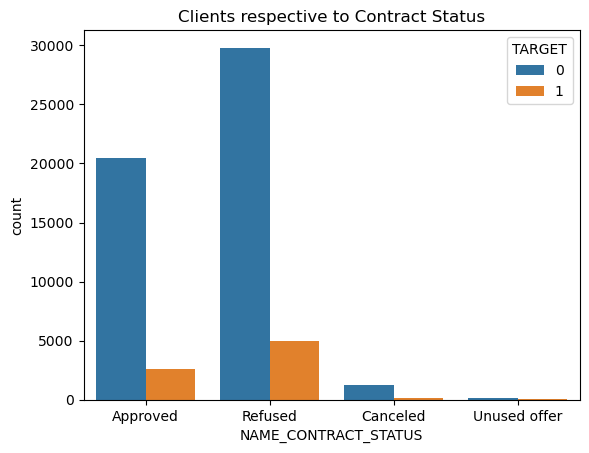

In [139]:
sns.countplot(data = Merged_df0, x = "NAME_CONTRACT_STATUS", hue = "TARGET")
plt.title("Clients respective to Contract Status")

### Conclusion - Clients whose previous application was refused are the most defaulters.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'With parents'),
  Text(1, 0, 'House / apartment'),
  Text(2, 0, 'Municipal apartment'),
  Text(3, 0, 'Office apartment'),
  Text(4, 0, 'Rented apartment'),
  Text(5, 0, 'Co-op apartment')])

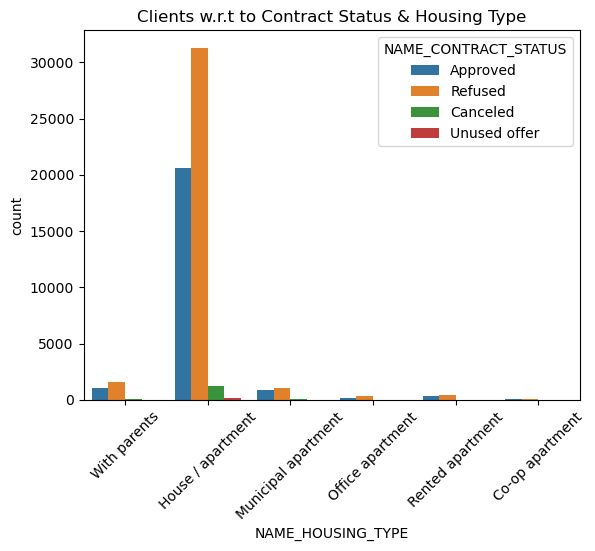

In [140]:
sns.countplot(data = Merged_df0, x = "NAME_HOUSING_TYPE", hue = "NAME_CONTRACT_STATUS")
plt.title("Clients w.r.t to Contract Status & Housing Type")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Clients w.r.t to Contract Status & Client Type')

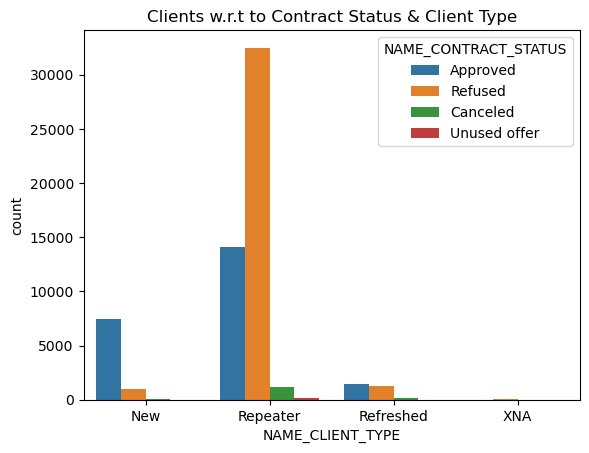

In [141]:
sns.countplot(Merged_df0['NAME_CLIENT_TYPE'],hue=Merged_df0['NAME_CONTRACT_STATUS'])
plt.title("Clients w.r.t to Contract Status & Client Type")

##### Considering the NAME_CLIENT_TYPE column values

In [142]:
Merged_df0.NAME_CLIENT_TYPE.value_counts(normalize=True) * 100

Repeater     80.658789
New          14.480240
Refreshed     4.793644
XNA           0.067326
Name: NAME_CLIENT_TYPE, dtype: float64

##### Considering NAME_CONTRACT_STATUS w.r.t NAME_CLIENT_TYPE as "Repeater"

In [143]:
Merged_df0[Merged_df0.NAME_CLIENT_TYPE == "Repeater"].NAME_CONTRACT_STATUS.value_counts()

Refused         32489
Approved        14131
Canceled         1134
Unused offer      167
Name: NAME_CONTRACT_STATUS, dtype: int64

### Conclusion - Repeaters are more whose loan is Refused.

###### Conclusion::
    Below are the highlighted points - 
        1. More Females have applied for loan.
        2. Clients with pay difficulties are less as compared to clients will no payment difficulties.
        3. Clients who own house but not car have no payment difficulties.
        4. Clients having no children are paying the loan properly.
        5. Female population are more who are paying the loan properly.
        6. Majority of clients with age group of 30-40 are paying the loan properly.
        7. Working peoples are paying the loans properly.
        8. Clients who have education type as 'Secondary/Secondary Special' have taken more loans.
        9. Clients having Income range less than 10000 dollar are the one’s who were paying of loans properly.
        10.Many clients have taken credits between 1000 to 10000 dollars are the one's who were payingoff the loan properly.
        11.More Females compared to men are having difficulties in paying the loan.
        12.Males who income more are the defaulters and females who paid less have difficulties in paying off the loans.
        13.Clients having 2 family members without children are the defaulters.
        14.Clients with low Income range peoples are more defaulters.
        15.Married Male and Female were having difficulties in paying the loan.
        16.Clients whose previous application was refused are the most defaulters.
        17.Repeaters client are more whose loan is Refused.